In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import dates
from datetime import datetime

# 1. Datetime

## 1.1 Datetime variable

In [ ]:
# year, month, day, hours, minutes
date = datetime(1994, 10, 1, 12, 20, 25)
date

datetime.datetime(1994, 10, 1, 12, 20, 25)

In [ ]:
print(f"Year:{date.year}\nMonth:{date.month}\nHour:{date.hour}")

Year:1994
Month:10
Hour:12


## 1.2 NumPy Datetime Arrays
NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

For more info on NumPy visit https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.datetime.html

In [ ]:
# CREATE AN ARRAY FROM THREE DATES
day = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')
hour = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]')
year = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')
month = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[M]')

<div class="alert alert-info"><strong>NOTE:</strong> We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.<br>
    If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [ ]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [ ]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [ ]:
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

## 1.3 Pandas Datetime Index
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

### 1.3.1 Datetime Creation

In [ ]:
# build a DatetimeIndex is with the pd.date_range() method
idx = pd.date_range('7/8/2018', periods=7, freq='2D')
idx

DatetimeIndex(['2018-07-08', '2018-07-10', '2018-07-12', '2018-07-14',
               '2018-07-16', '2018-07-18', '2018-07-20'],
              dtype='datetime64[ns]', freq='2D')

In [ ]:
# convert incoming text with the pd.to_datetime() method
idx = pd.to_datetime(['Jan 01, 2018', '1/2/18','03-Jan-2018', None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(idx)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
# pass a list or an array of datetime objects into the pd.DatetimeIndex() method
dateindex = pd.DatetimeIndex(np.arange('2018-06-01', '2018-06-20', 7, dtype='datetime64[D]'))
dateindex

DatetimeIndex(['2018-06-01', '2018-06-08', '2018-06-15'], dtype='datetime64[ns]', freq=None)

### 1.3.2 DataFrame Creation

In [ ]:
# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data=np.random.randn(3, 2), index=dateindex, columns=['A', 'B'])
df

,A,B
2018-06-01,0.727881,-0.426290
2018-06-08,0.714375,0.390904
2018-06-15,0.490464,-1.215254


In [ ]:
df.index

DatetimeIndex(['2018-06-01', '2018-06-08', '2018-06-15'], dtype='datetime64[ns]', freq=None)

In [ ]:
df.index.max()

Timestamp('2018-06-15 00:00:00')

In [ ]:
df.index.argmax()

2

### 1.3.4 Time Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/gupta24789/Machine-Learning-Datasets/master/starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
df.resample('2Y').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2017-12-31,54.672965,9.298360e+06
2019-12-31,56.870005,1.122883e+07


In [ ]:
# define own function, return middle month
df.resample('Y').apply(lambda x: x[int(len(x)/2)])

,Close,Volume
Date,,
2015-12-31,51.0326,5396439
2016-12-31,54.0332,7274208
2017-12-31,56.3757,4575268
2018-12-31,48.4606,9870932


### 1.3.5 Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/gupta24789/Machine-Learning-Datasets/master/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [ ]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


### 1.3.6 Rolling

In [ ]:
# 7 day rolling mean
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


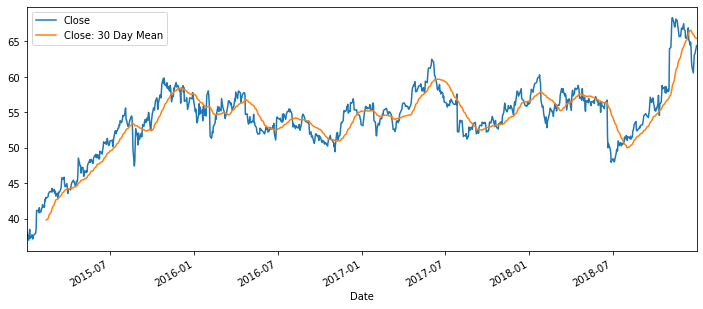

In [ ]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

### 1.3.7 Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

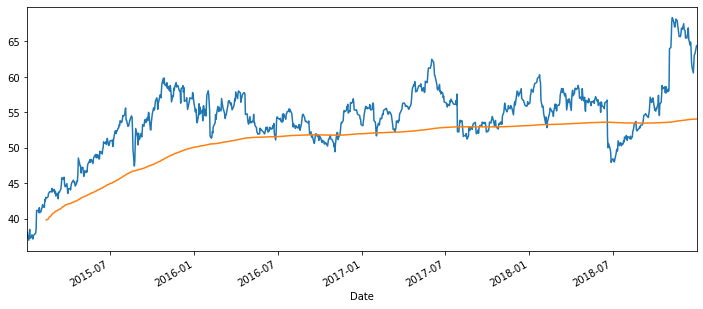

In [ ]:
# Optional: specify a minimum number of periods to start from
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

# 2. Plotting

## 2.1 Scatter Plot

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/gupta24789/Machine-Learning-Datasets/master/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


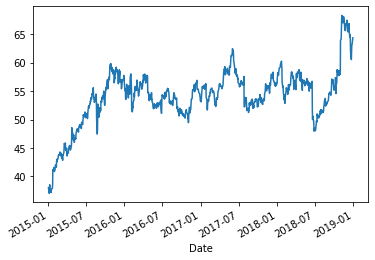

In [ ]:
df['Close'].plot();

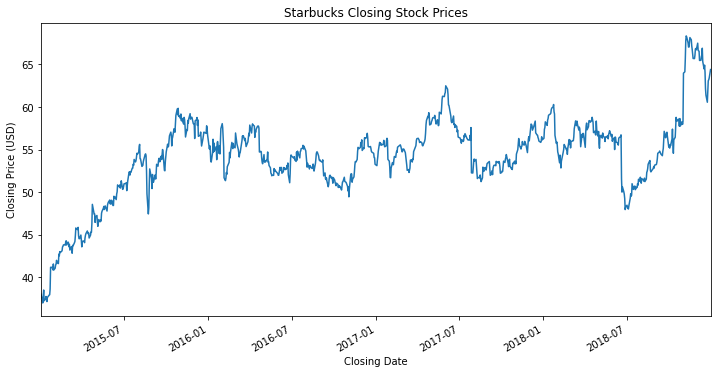

In [ ]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

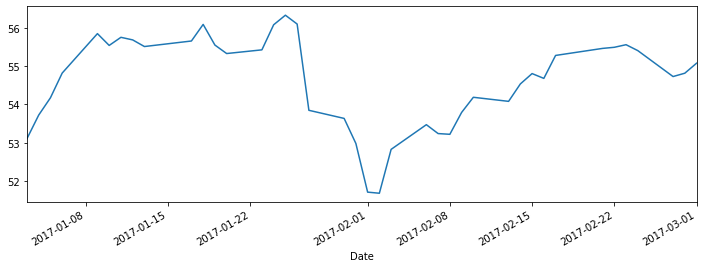

In [ ]:
# choosing x limit
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

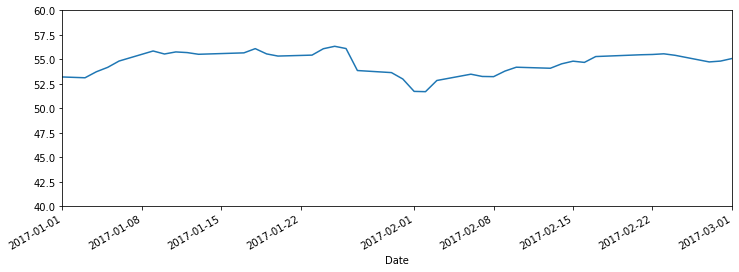

In [ ]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12, 4), xlim=['2017-01-01','2017-03-01'], ylim=[40,60]);

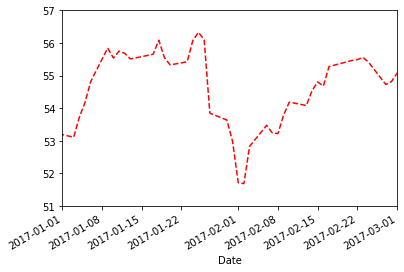

In [ ]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

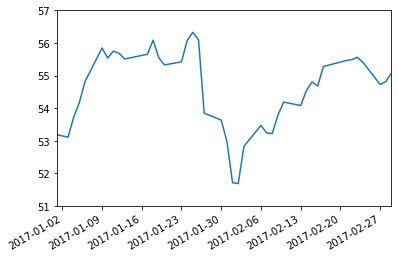

In [ ]:
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
# example
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

## 2.2 Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

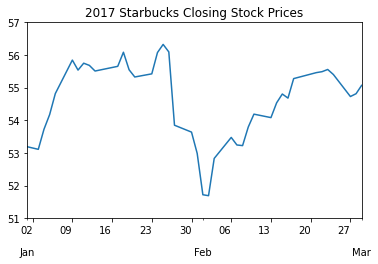

In [ ]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

<font><strong>NOTE: </strong>we passed a rotation argument <font><strong>rot=0</strong></font> into <tt><font>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.

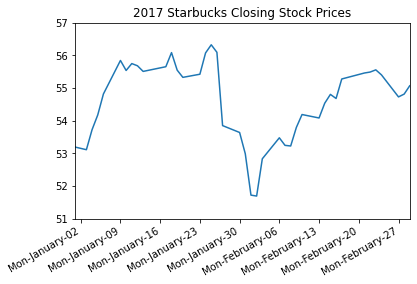

In [ ]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))